#Project Name - **Amazon Prime TV Shows and Movies Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual


#### **BUSINESS OVERVIEW**

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

In today’s competitive streaming landscape, Amazon Prime Video must leverage data to guide **content strategy** and **user engagement**.

This project analyzes its U.S. content library to identify trends in **genres**, show types, **release patterns**, and **ratings**.

The insights will help stakeholders make informed decisions on content planning and investment.


#### **Define Your Business Objective?**

-  *Identify key content trends on Amazon Prime Video to support data-driven content*

-  *User engagement strategies on key area.*

# **General Guidelines** : -  

1. Explore both datasets (titles.csv, credits.csv)

2. Clean data: handle nulls, correct types, parse lists

3. Analyze show types, genres, years, regions, ratings

4. Visualize using at least 5 different chart types

5. Join datasets to study actor/director trends

6. Extract insights relevant to content strategy

7. Present clearly with concise plots and summaries

# **Project**


## 1. **Dataset Overview**

### 1.1 *Libraries used*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 *Dataset Loading*

In [2]:
csv_url_titles = 'https://drive.google.com/uc?id=1VsVl6xTefl2320WkuM1DGkLJFc58KfX8'
csv_url_data_credits = 'https://drive.google.com/uc?id=1k8XUK0Bq_C89EZ5X0SaRGd3GQB0GWvjY'
data_titles = pd.read_csv(csv_url_titles)
data_credits = pd.read_csv(csv_url_data_credits)

### 1.3 *Dataset First view*

The dataset includes two CSV files:

one containing content details and another with cast and crew information.

In [3]:
data_titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
data_titles.tail(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN


In [5]:

data_credits.head(5)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [6]:
data_credits.tail(5)

,person_id,id,name,character,role
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


### 1.4 *Dataset information*

In [7]:
print(data_titles.info())
print("\n")
print(data_credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### **Dataset Shape**

In [8]:
print(f"the content titles row columns: {data_titles.shape}")
print(f"the cast credits row columns: {data_credits.shape}")

the content titles row columns: (9871, 15)
the cast credits row columns: (124235, 5)


#### **Missing Values**

In [9]:
print("missing value in titles")
print(data_titles.isnull().sum())
print("\nmissing value in credits")
print(data_credits.isnull().sum())

missing value in titles
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

missing value in credits
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


The above figure explains the missing values across both datasets — `data_titles` and `data_credits` — where yellow (or brighter) cells indicate missing entries. From the heatmaps, we can observe which specific columns contain null values and how frequently they occur, helping us identify which features may need cleaning, imputation, or removal.

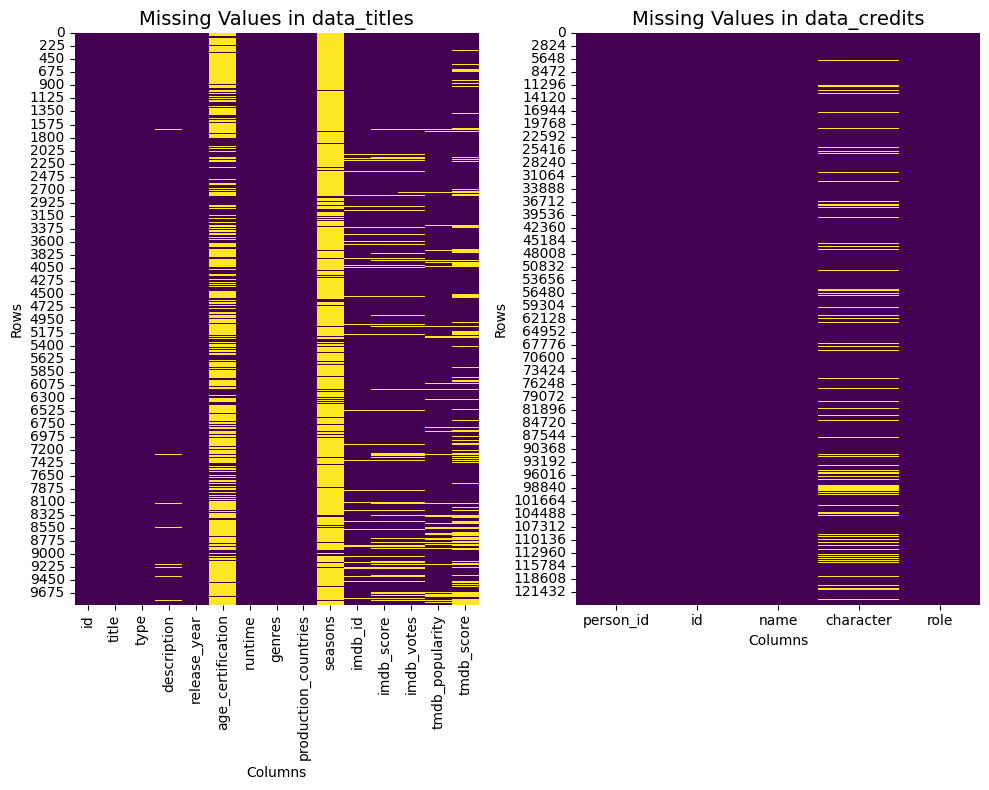

In [10]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Heatmap for data_titles
sns.heatmap(data_titles.isnull(),
            ax=axes[0],
            cbar=False,
            cmap="viridis")
axes[0].set_title("Missing Values in data_titles", fontsize=14)
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Heatmap for data_credits
sns.heatmap(data_credits.isnull(),
            ax=axes[1],
            cbar=False,
            cmap="viridis")
axes[1].set_title("Missing Values in data_credits", fontsize=14)
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

plt.tight_layout()
plt.show()

#### **Duplicate Values**

Duplicate IDs found in titles data — `tm89134` (rows 479 & 480), `tm66674` (rows 718 & 720), and `tm137955` (rows 719 & 722).

In [11]:
duplicates_on_titles = data_titles[data_titles.duplicated(keep=False)]
duplicates_on_titles


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
479,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
718,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
719,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


Duplicate IDs found in credits data — there are 112 duplicates.

In [12]:
duplicates_on_credits = data_credits[data_credits.duplicated(keep=False)]
duplicates_on_credits_sorted = duplicates_on_credits.sort_values(by='person_id')

print(f"The number of duplicates in the credits is {len(duplicates_on_credits_sorted)}")
duplicates_on_credits_sorted


The number of duplicates in the credits is 112


,person_id,id,name,character,role
12957,13331,tm66674,Irving Bacon,Jake,ACTOR
12989,13331,tm66674,Irving Bacon,Jake,ACTOR
9170,13370,tm89134,Kernan Cripps,Al,ACTOR
9146,13370,tm89134,Kernan Cripps,Al,ACTOR
12970,13427,tm66674,Dan White,Skipper Brown (uncredited),ACTOR
...,...,...,...,...,...
12981,576342,tm137955,Clarence Geldart,Dr. Fleming,ACTOR
12983,576620,tm137955,Finis Barton,Gladys,ACTOR
13035,576620,tm137955,Finis Barton,Gladys,ACTOR
9172,685522,tm89134,Frederick Gee,Gibbs Baby,ACTOR


## 2. **Understanding Dataset Variable**

In [13]:
print("The columns in titles data are--> ")
print(data_titles.columns)
print("\nThe columns in credits data are--> ")
print(data_credits.columns)

The columns in titles data are--> 
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

The columns in credits data are--> 
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [14]:
data_titles.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,9871.0,2001.327221,25.810071,1912.000000,1995.500,2014.000,2018.000,2022.000
runtime,9871.0,85.973052,33.512466,1.000000,65.000,89.000,102.000,549.000
seasons,1357.0,2.791452,4.148958,1.000000,1.000,1.000,3.000,51.000
imdb_score,8850.0,5.976395,1.343842,1.100000,5.100,6.100,6.900,9.900
imdb_votes,8840.0,8533.614253,45920.151905,5.000000,117.000,462.500,2236.250,1133692.000
tmdb_popularity,9324.0,6.910204,30.004098,0.000011,1.232,2.536,5.634,1437.906
tmdb_score,7789.0,5.984247,1.517986,0.800000,5.100,6.000,6.900,10.000


### 2.1 **Variables Description**

This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

 * id: The title ID on JustWatch.
 * title: The name of the title.
 * show_type: TV show or movie.
 * description: A brief description.
 * release_year: The release year.
 * age_certification: The age certification.
 * runtime: The length of the episode (SHOW) or movie.
 * genres: A list of genres.
 * production_countries: A list of countries that produced the title.
 * seasons: Number of seasons if it's a SHOW.
 * imdb_id: The title ID on IMDB.
 * imdb_score: Score on IMDB.
 * imdb_votes: Votes on IMDB.
 * tmdb_popularity: Popularity on TMDB.
 * tmdb_score: Score on TMDB.

Over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

 * person_ID: The person ID on JustWatch.
 * id: The title ID on JustWatch.
 * name: The actor or director's name.
 * character_name: The character name.
 * role: ACTOR or DIRECTOR.

### 2.2 **Variables DataType**

In [15]:
print(f"The data type of the title data is--> \n{data_titles.dtypes}")

The data type of the title data is--> 
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


In [16]:
print(f"The data type of the title data is--> \n{data_credits.dtypes}")

The data type of the title data is--> 
person_id     int64
id           object
name         object
character    object
role         object
dtype: object


### 2.3 **Variables unique values**

In [17]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [18]:
for i in data_titles.select_dtypes(include=['object']):
  if i not in ['id','title','description','production_countries','imdb_id']:
    print(f"The Column name : [{i}] contain following values:\n")
    print(data_titles.loc[:,i].unique())
    print("\n")
    print(f"The total value count of {data_titles.value_counts(i)}")
    print("\n\n")

The Column name : [type] contain following values:

['SHOW' 'MOVIE']


The total value count of type
MOVIE    8514
SHOW     1357
Name: count, dtype: int64



The Column name : [age_certification] contain following values:

['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


The total value count of age_certification
R        1249
PG-13     588
PG        582
G         269
TV-MA     217
TV-14     188
TV-PG      91
TV-Y       78
TV-G       57
TV-Y7      52
NC-17      13
Name: count, dtype: int64



The Column name : [genres] contain following values:

["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']"
 "['action', 'drama', 'war', 'western', 'comedy', 'european']"
 "['romance', 'war', 'drama']" ... "['drama', 'family', 'thriller']"
 "['thriller', 'western', 'comedy']" "['comedy', 'action', 'family']"]


The total value count of genres
['drama']                                                            908
['comedy']                         

In [19]:
for i in data_credits.select_dtypes(include=['object']):
  if i not in ['id','name','character']:
    print(f"The Column name : [{i}] contain following values:\n")
    print(data_credits.loc[:,i].unique())
    print("\n")
    print(f"The total value count of {data_credits.value_counts(i)}")
    print("\n\n")

The Column name : [role] contain following values:

['ACTOR' 'DIRECTOR']


The total value count of role
ACTOR       115846
DIRECTOR      8389
Name: count, dtype: int64





## 3. **Handeling Missing Values**

**Missing Value in Titles**

In [20]:
(data_titles.isnull().sum()/len(data_titles))*100

,0
id,0.000000
title,0.000000
type,0.000000
description,1.205552
release_year,0.000000
age_certification,65.717759
runtime,0.000000
genres,0.000000
production_countries,0.000000
seasons,86.252659


In [21]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

From the above we can see missing percentage of columns age_certification and seasons are more than 50% this may lead to miss leading conclusion where we may safely drop the columns

In [22]:
data_titles.drop(["seasons","age_certification"], axis=1,inplace=True)

After columns drop the result is :-

In [23]:
(data_titles.isnull().sum()/len(data_titles))*100

,0
id,0.000000
title,0.000000
type,0.000000
description,1.205552
release_year,0.000000
runtime,0.000000
genres,0.000000
production_countries,0.000000
imdb_id,6.757167
imdb_score,10.343430


In [24]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [25]:
# skew=0: normal
# -0.5 to 0.5 : normal
# skew<-0.5 and skew>0.5 : skewed
# skew <-0.5 : left skew
# skew>0.5:right skew
print(f"imdb_score : {data_titles.loc[:,'imdb_score'].skew()>-0.5 and data_titles.loc[:,'imdb_score'].skew()<0.5}")
print(f"imdb_votes : {data_titles.loc[:,'imdb_votes'].skew()>-0.5 and data_titles.loc[:,'imdb_votes'].skew()<0.5}")
print(f"tmdb_popularity : {data_titles.loc[:,'tmdb_popularity'].skew()>-0.5 and data_titles.loc[:,'tmdb_popularity'].skew()<0.5}")
print(f"tmdb_score : {data_titles.loc[:,'tmdb_score'].skew()>-0.5 and data_titles.loc[:,'tmdb_score'].skew()<0.5}")


imdb_score : True
imdb_votes : False
tmdb_popularity : False
tmdb_score : True


-  imdb_score : Normal distribution (mean)
-  imdb_votes : Skewed (median)
-  tmdb_popularity : Skewed (median)
-  tmdb_score : Normal distribution (mean)

In [26]:
data_titles.loc[:,"imdb_score"].fillna(data_titles.loc[:,"imdb_score"].mean(),inplace=True)
data_titles.loc[:,"imdb_votes"].fillna(data_titles.loc[:,"imdb_votes"].median(),inplace=True)
data_titles.loc[:,"tmdb_popularity"].fillna(data_titles.loc[:,"tmdb_popularity"].median(),inplace=True)
data_titles.loc[:,"tmdb_score"].fillna(data_titles.loc[:,"tmdb_score"].mean(),inplace=True)
(data_titles.isnull().sum()/len(data_titles))*100

/tmp/ipython-input-26-783688968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titles.loc[:,"imdb_score"].fillna(data_titles.loc[:,"imdb_score"].mean(),inplace=True)
/tmp/ipython-input-26-783688968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

,0
id,0.000000
title,0.000000
type,0.000000
description,1.205552
release_year,0.000000
runtime,0.000000
genres,0.000000
production_countries,0.000000
imdb_id,6.757167
imdb_score,0.000000


- Since the description and imdb are the columns carry unique charcter and at null place we can't replace by a mode of the columns which may lead to meaningless data so right now we ignore this columns.

- we are also not deleting this row because in further we may not use the columns for any operation

**Missing Value in Credits**

In [27]:
(data_credits.isnull().sum()/len(data_credits))*100

,0
person_id,0.000000
id,0.000000
name,0.000000
character,13.109832
role,0.000000


In [28]:
data_credits.loc[:,"character"].value_counts()

,count
character,
Himself,1540
Self,1245
Herself,418
Henchman,242
Dancer,221
...,...
Menelaus 'Pappy' O'Daniel,1
Washington B. 'Wash' Hogwallop,1
Penny Wharvey-McGill,1


So character is also a unique value associated to the person and his role

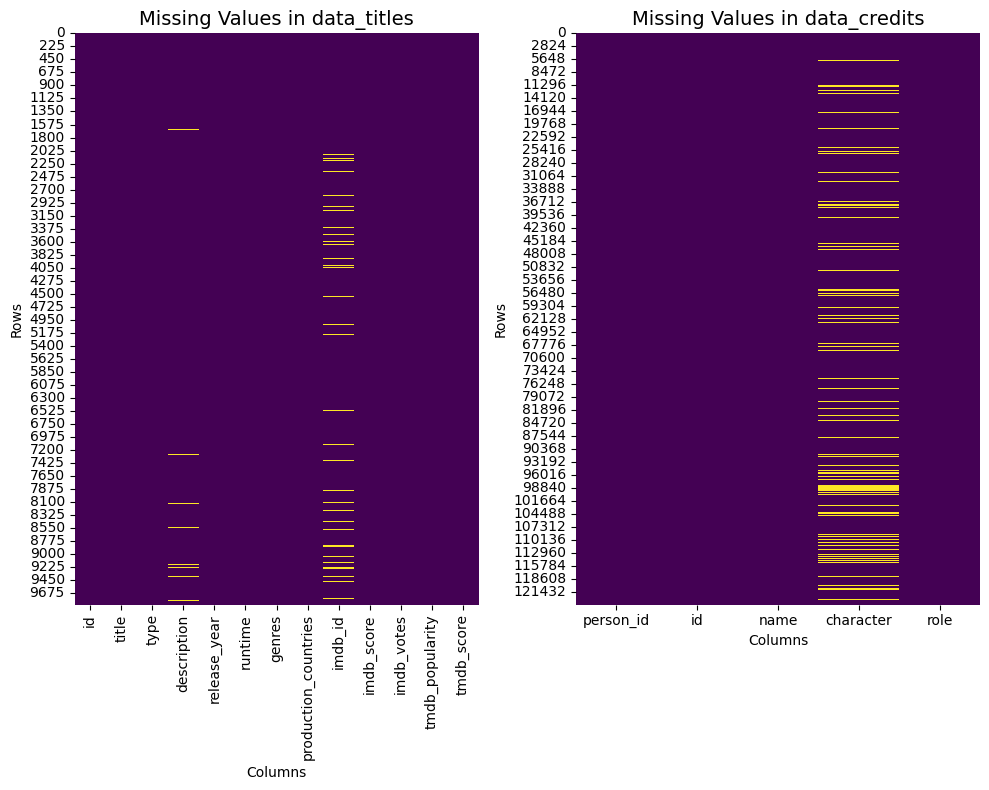

In [29]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Heatmap for data_titles
sns.heatmap(data_titles.isnull(),
            ax=axes[0],
            cbar=False,
            cmap="viridis")
axes[0].set_title("Missing Values in data_titles", fontsize=14)
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Heatmap for data_credits
sns.heatmap(data_credits.isnull(),
            ax=axes[1],
            cbar=False,
            cmap="viridis")
axes[1].set_title("Missing Values in data_credits", fontsize=14)
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

plt.tight_layout()
plt.show()

## 4. **Handeling Duplicates**

In [30]:
duplicates_on_titles = data_titles[data_titles.duplicated(keep=False)]
print(len(duplicates_on_titles))
duplicates_on_titles

6


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
479,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,62,['western'],['US'],tt0033683,5.9,133.0,0.991,7.000000
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,62,['western'],['US'],tt0033683,5.9,133.0,0.991,7.000000
718,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,68,"['drama', 'crime']",['US'],tt0039343,5.0,24.0,0.841,5.984247
719,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,68,"['drama', 'romance']",['US'],tt0023849,5.8,74.0,0.600,5.984247
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,68,"['drama', 'crime']",['US'],tt0039343,5.0,24.0,0.841,5.984247
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,68,"['drama', 'romance']",['US'],tt0023849,5.8,74.0,0.600,5.984247


In [31]:
data_titles = data_titles.drop_duplicates(keep='first')
data_titles[data_titles.duplicated(keep=False)]

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [32]:
duplicates_on_credits = data_credits[data_credits.duplicated(keep=False)]
duplicates_on_credits_sorted = duplicates_on_credits.sort_values(by='person_id')

print(f"The number of duplicates in the credits is {len(duplicates_on_credits_sorted)}")
duplicates_on_credits_sorted

The number of duplicates in the credits is 112


,person_id,id,name,character,role
12957,13331,tm66674,Irving Bacon,Jake,ACTOR
12989,13331,tm66674,Irving Bacon,Jake,ACTOR
9170,13370,tm89134,Kernan Cripps,Al,ACTOR
9146,13370,tm89134,Kernan Cripps,Al,ACTOR
12970,13427,tm66674,Dan White,Skipper Brown (uncredited),ACTOR
...,...,...,...,...,...
12981,576342,tm137955,Clarence Geldart,Dr. Fleming,ACTOR
12983,576620,tm137955,Finis Barton,Gladys,ACTOR
13035,576620,tm137955,Finis Barton,Gladys,ACTOR
9172,685522,tm89134,Frederick Gee,Gibbs Baby,ACTOR


In [33]:
data_credits = data_credits.drop_duplicates(keep='first')
data_credits[data_credits.duplicated(keep=False)]

,person_id,id,name,character,role


## 5. **Visualisation**

### **Univariate Analysis**

In [34]:
def str_to_list(list_v1):
    imp = eval(list_v1)
    if len(imp) != 0:
        return imp
    else:
        return np.nan

In [35]:
data_titles.loc[0,'genres']

"['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']"

make new table having unique generes from genres list and next column have number in how many titels appeared

In [36]:
genre_counts_df = data_titles.loc[:,'genres'].apply(str_to_list)

In [37]:
genre_counts_df=pd.DataFrame(genre_counts_df)
genre_counts_df

,genres
0,"[comedy, family, animation, action, fantasy, h..."
1,"[action, drama, war, western, comedy, european]"
2,"[romance, war, drama]"
3,"[comedy, drama, romance]"
4,"[thriller, drama, romance]"
...,...
9866,[drama]
9867,[comedy]
9868,[crime]
9869,"[family, drama]"


In [38]:
# Flatten the list of genres
genre_list = genre_counts_df['genres'].explode()
genre_list

,genres
0,comedy
0,family
0,animation
0,action
0,fantasy
...,...
9867,comedy
9868,crime
9869,family
9869,drama


In [39]:
gen_count = genre_list.value_counts().reset_index()
gen_count

,genres,count
0,drama,4762
1,comedy,2987
2,thriller,2119
3,action,1820
4,romance,1751
5,crime,1250
6,documentation,1096
7,horror,1065
8,family,751
9,european,712


In [40]:
country = data_titles.loc[:,"production_countries"].apply(str_to_list)
country = pd.DataFrame(country)
country_name = country.loc[:,'production_countries'].explode()
country_name_count=country_name.value_counts()
country_name_count

,count
production_countries,
US,5331
IN,1072
GB,928
CA,530
FR,250
...,...
EC,1
AM,1
SY,1


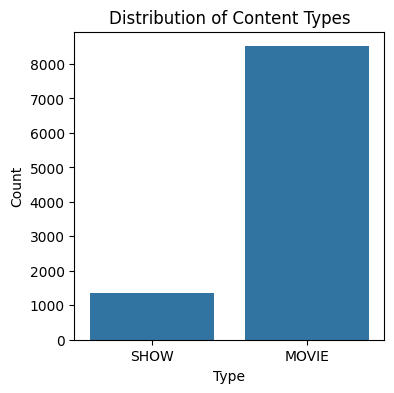

In [41]:
plt.figure(figsize=(4,4))
sns.countplot(data=data_titles, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

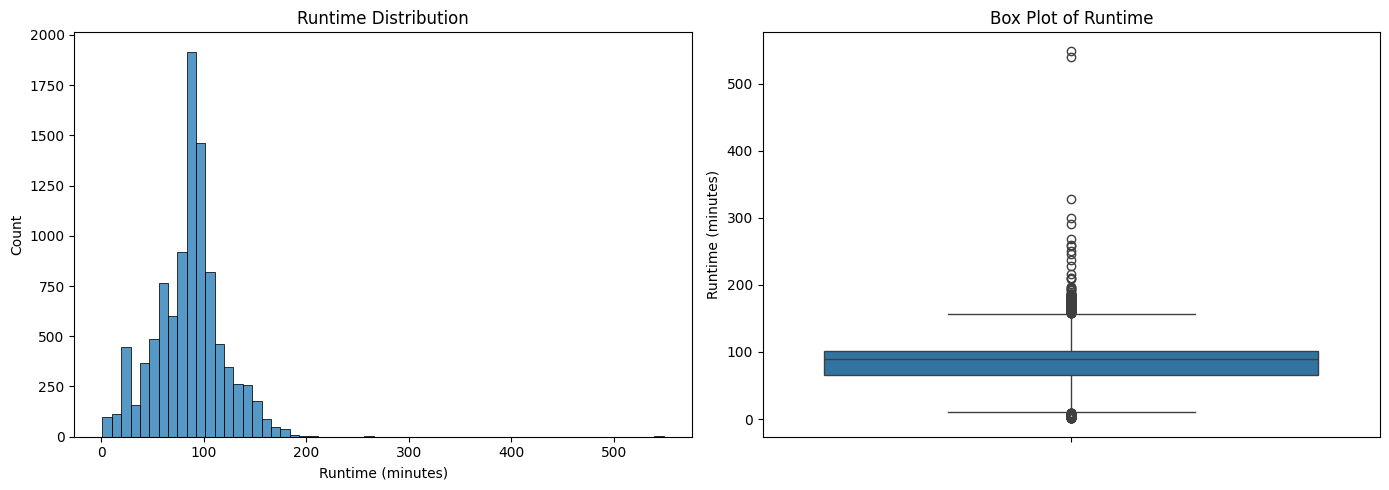

In [42]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot on the first axis
sns.boxplot(data=data_titles, y='runtime', ax=axes[1])
axes[1].set_title('Box Plot of Runtime')
axes[1].set_ylabel('Runtime (minutes)')

# Histogram on the second axis
sns.histplot(data=data_titles, x='runtime', bins=60, ax=axes[0])
axes[0].set_title('Runtime Distribution')
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [43]:
data_titles.loc[:,'release_year'].max()

2022

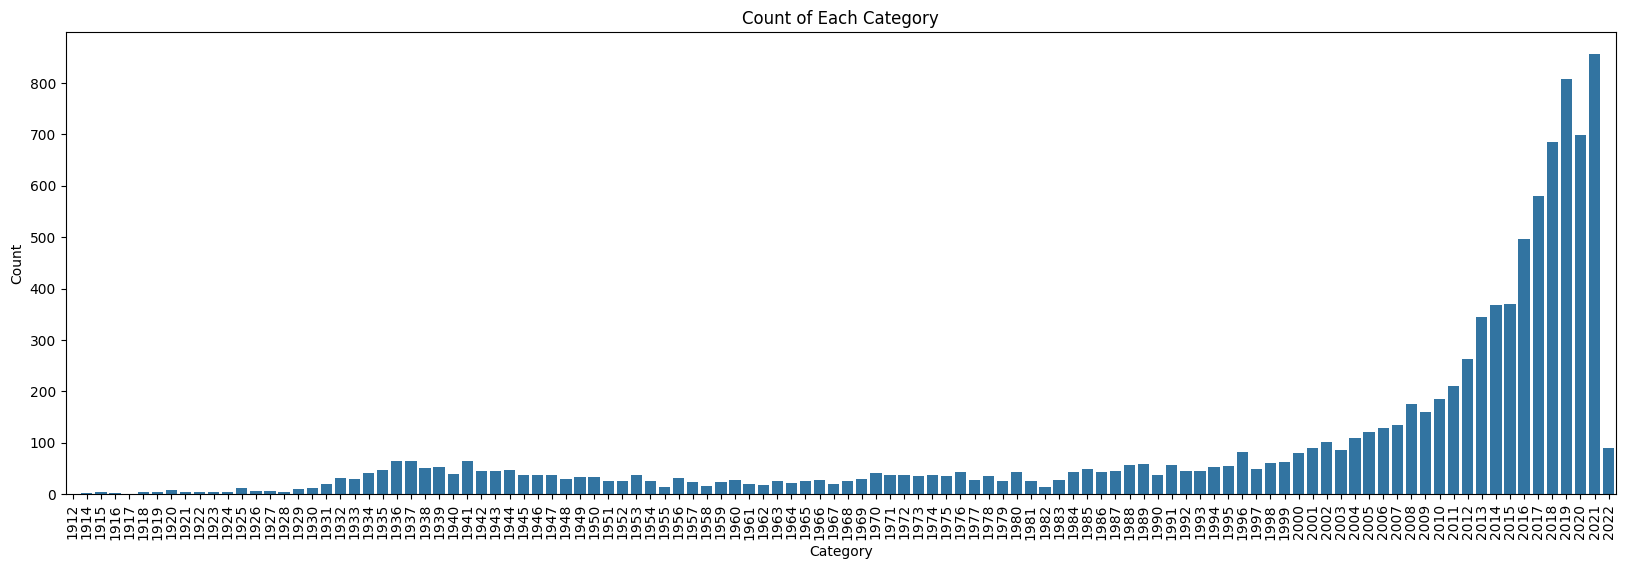

In [44]:

# Example: Count plot for a column named 'category' in a DataFrame 'df'
plt.figure(figsize=(20, 6))
sns.countplot(data=data_titles, x='release_year')

plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-45-4181142216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


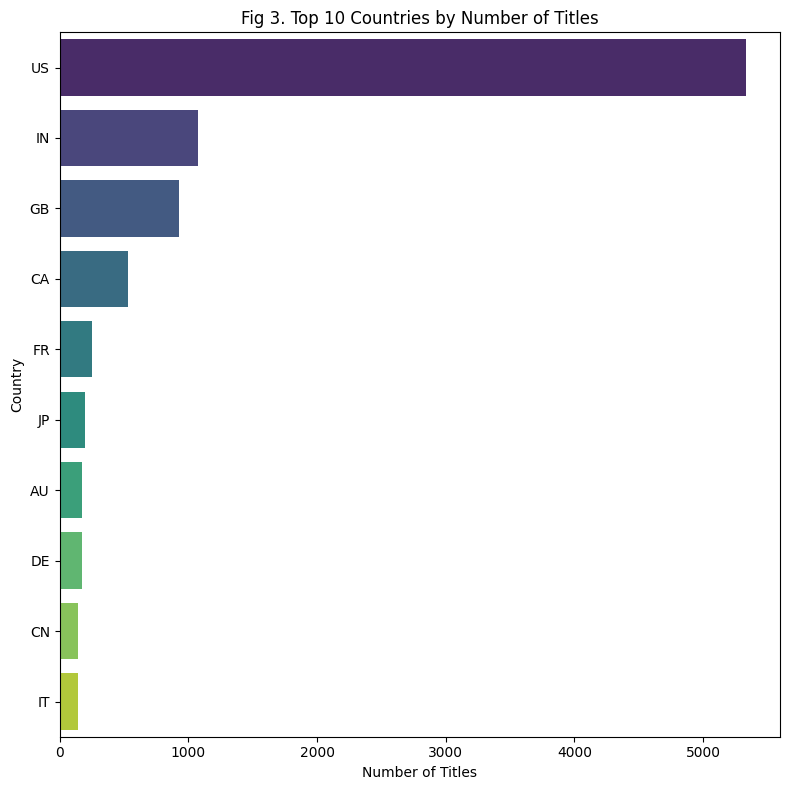

In [45]:
plt.figure(figsize=(8, 8))  # 3 rows × 2 columns

# 3. Country Distribution Bar Plot (Vertical)
top_countries = country_name_count.sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Fig 3. Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')


plt.tight_layout()
plt.show()


### **Bivariate Analysis**

In [46]:
print(type(data_titles.loc[0,'genres']))

<class 'str'>


In [47]:
# convert string to list
data_titles.loc[:,'genres'] = data_titles.loc[:,'genres'].apply(str_to_list)

In [48]:
print(type(data_titles.loc[0,'genres']))

<class 'list'>


In [49]:
data_titles.loc[:,'production_countries'] = data_titles.loc[:,'production_countries'].apply(str_to_list)

In [50]:
# Explode both
df_titles_explode = data_titles.explode('genres').explode('production_countries')
# df_bubble = df_bubble.dropna(subset=['genres', 'production_countries', 'tmdb_popularity'])
df_titles_explode.head(5)

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,comedy,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,family,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,animation,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,action,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,fantasy,US,tt0850645,8.6,1092.0,15.424,7.6


In [51]:
print(f"percentage of NULL value in production_countries columns {(df_titles_explode.loc[:,'production_countries'].isnull().sum()/len(df_titles_explode.loc[:,'production_countries']))*100:.2f}%")

percentage of NULL value in production_countries columns 4.74%


In [52]:
df_titles_explode = df_titles_explode.dropna(subset=['production_countries'])

In [53]:
print(f"percentage of NULL value in production_countries columns {(df_titles_explode.loc[:,'production_countries'].isnull().sum()/len(df_titles_explode.loc[:,'production_countries']))*100:.2f}%")

percentage of NULL value in production_countries columns 0.00%


In [54]:

top_cont_gen_imdb = df_titles_explode.groupby('genres')['imdb_votes'].sum().sort_values(ascending=False).reset_index()

top_cont_pop_tmdb = df_titles_explode.groupby('genres')['tmdb_popularity'].sum().sort_values(ascending=False).reset_index()


In [55]:
# average imdb score
avg_imdb_score = df_titles_explode.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index()
# average tmdb score
avg_tmdb_score = df_titles_explode.groupby('genres')['tmdb_score'].mean().sort_values(ascending=False).reset_index()

/tmp/ipython-input-56-3002978701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y='genres', x='imdb_score', data=avg_imdb_score, palette='viridis')
/tmp/ipython-input-56-3002978701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y='genres', x='tmdb_score', data=avg_tmdb_score, palette='viridis')


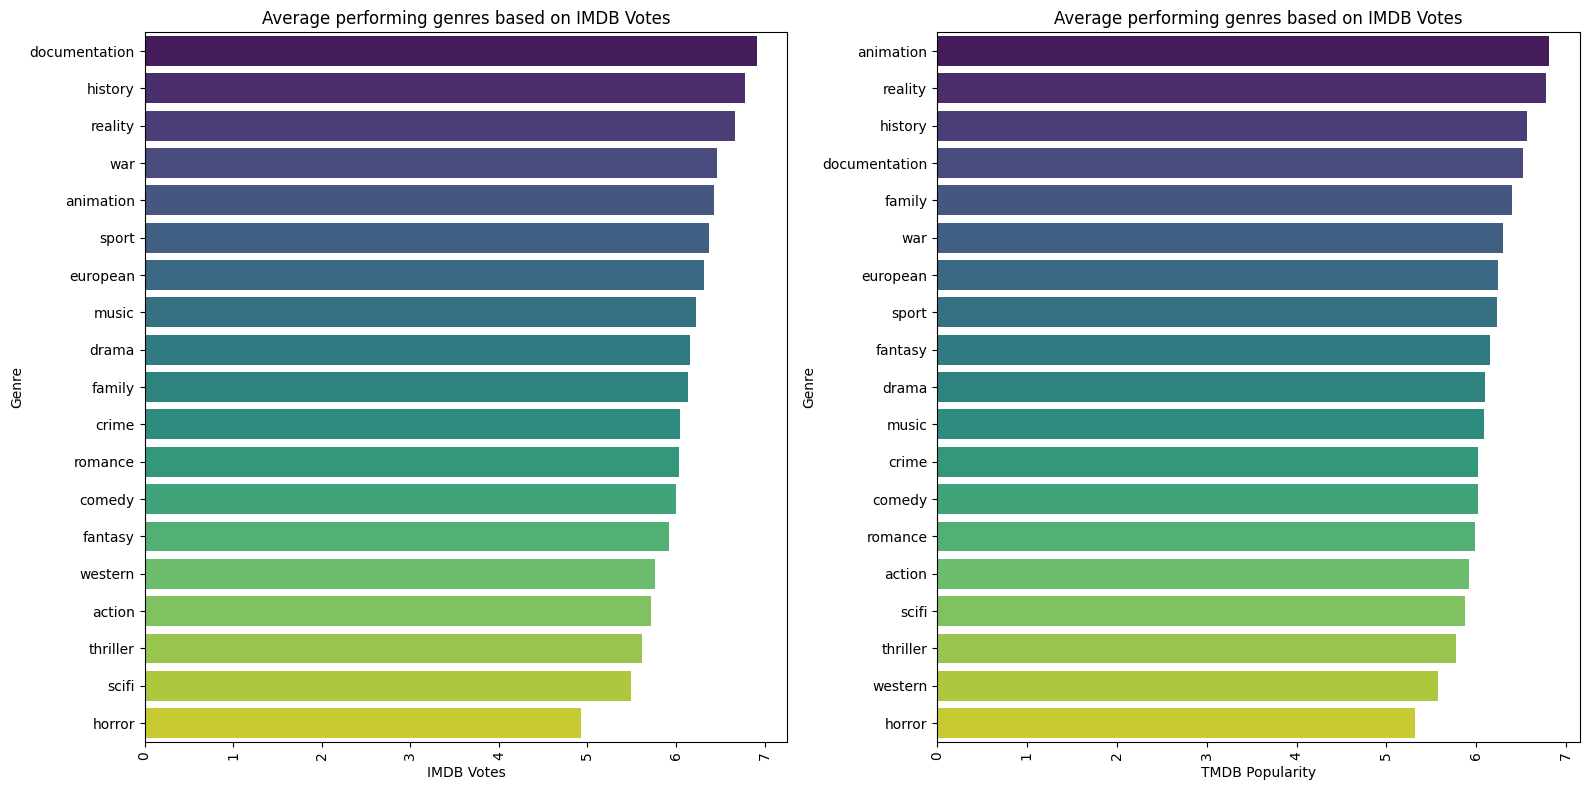

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.barplot(ax=axes[0], y='genres', x='imdb_score', data=avg_imdb_score, palette='viridis')
axes[0].set_title('Average performing genres based on IMDB Votes')
axes[0].set_ylabel('Genre')
axes[0].set_xlabel('IMDB Votes')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[1], y='genres', x='tmdb_score', data=avg_tmdb_score, palette='viridis')
axes[1].set_title('Average performing genres based on IMDB Votes')
axes[1].set_ylabel('Genre')
axes[1].set_xlabel('TMDB Popularity')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [57]:
import plotly.express as px

# Ensure primary_genre exists
data_titles['primary_genre'] = data_titles['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Create the base figure (no filtering yet)
fig = px.scatter(
    data_titles,
    x='release_year',
    y='imdb_score',
    color='primary_genre',
    title='IMDB Score by Release Year and Genre',
    labels={'release_year': 'Release Year', 'imdb_score': 'IMDB Score'},
    opacity=0.7
)

# Create dropdown options to filter by genre
genres = data_titles['primary_genre'].unique()
dropdown_buttons = [
    dict(label="All Genres",
         method="update",
         args=[{"visible": [True] * len(fig.data)},
               {"title": "IMDB Score by Release Year and Genre"}])
]

# Add one trace per genre, and hide all others initially
for i, genre in enumerate(genres):
    visible = [False] * len(fig.data)
    visible[i] = True
    dropdown_buttons.append(
        dict(label=genre,
             method="update",
             args=[{"visible": visible},
                   {"title": f"IMDB Score by Release Year — {genre}"}])
    )

# Add dropdown to layout
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=1.15,
        y=1.15
    )],
    legend_title_text='Primary Genre',
    margin=dict(r=200)
)

fig.show()


In [58]:
# Create a new column that bins 'release_year' into 5-year intervals
data_titles['release_year_5yr'] = (data_titles['release_year'] // 5) * 5
data_titles['release_year_5yr'].head(5)

,release_year_5yr
0,1930
1,1925
2,1945
3,1940
4,1950


In [59]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'primary_genre', 'release_year_5yr'],
      dtype='object')

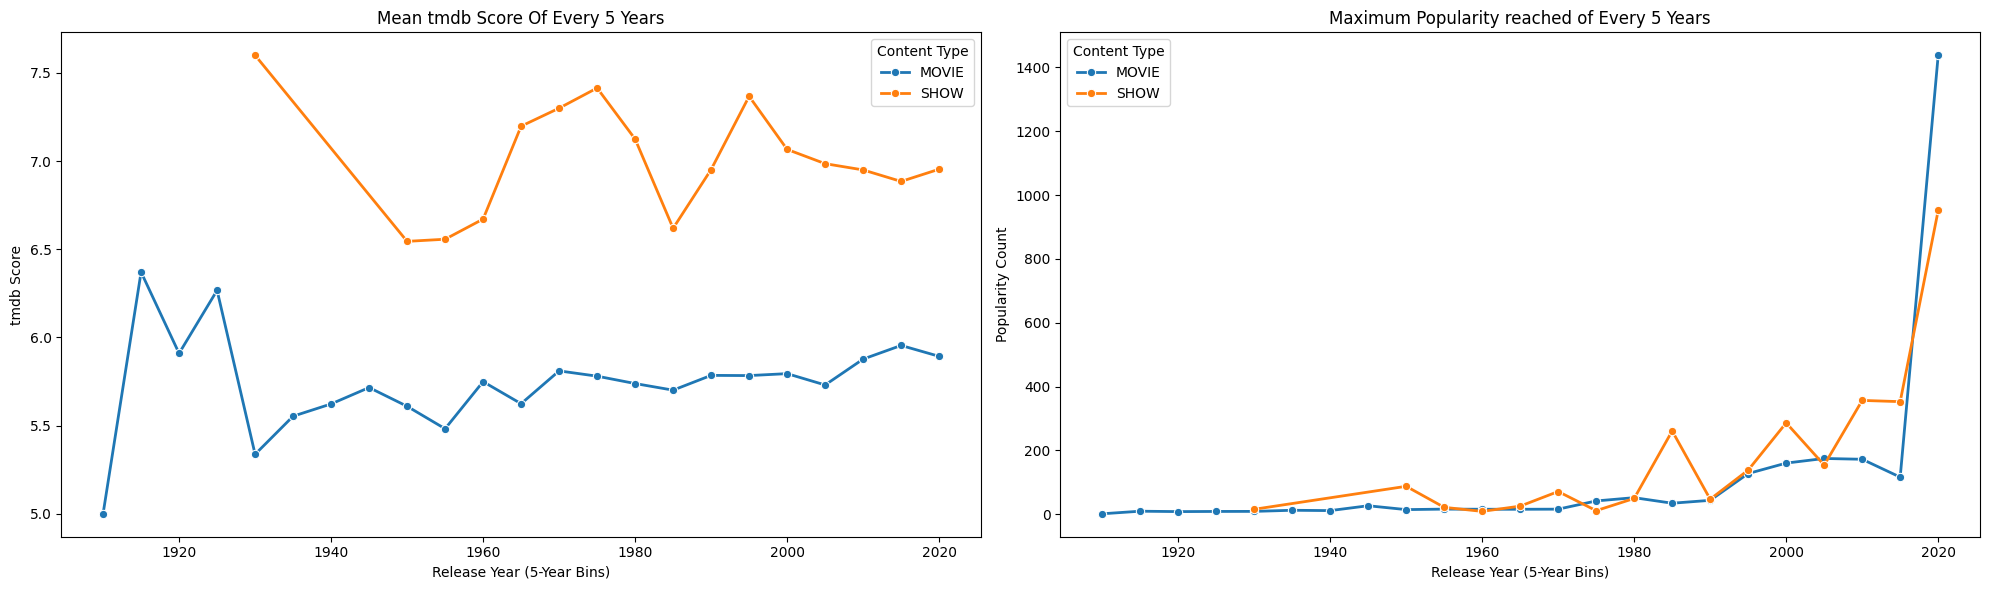

In [60]:


# Prepare grouped data
grouped_mean = data_titles.groupby(['release_year_5yr', 'type'])['tmdb_score'].mean().reset_index()
grouped_max = data_titles.groupby(['release_year_5yr', 'type'])['tmdb_popularity'].max().reset_index()

# Create horizontal subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Horizontal layout

# Plot Mean
sns.lineplot(
    data=grouped_mean,
    x='release_year_5yr',
    y='tmdb_score',
    hue='type',
    palette=['#1f77b4', '#ff7f0e'],
    linewidth=2,
    marker='o',
    ax=ax1
)
ax1.set_title('Mean tmdb Score Of Every 5 Years')
ax1.set_xlabel('Release Year (5-Year Bins)')
ax1.set_ylabel('tmdb Score')
ax1.legend().set_title('Content Type')

# Plot Max
sns.lineplot(
    data=grouped_max,
    x='release_year_5yr',
    y='tmdb_popularity',
    hue='type',
    palette=['#1f77b4', '#ff7f0e'],
    linewidth=2,
    marker='o',
    ax=ax2
)
ax2.set_title('Maximum Popularity reached of Every 5 Years')
ax2.set_xlabel('Release Year (5-Year Bins)')
ax2.set_ylabel('Popularity Count')
ax2.legend().set_title('Content Type')

plt.tight_layout()
plt.show()


In [67]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'primary_genre', 'release_year_5yr'],
      dtype='object')

In [70]:
# Ensure primary_genre column is available
data_titles['primary_genre'] = data_titles['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Group and aggregate
grouped = data_titles.groupby(['release_year_5yr', 'primary_genre','type']).agg(
    mean_score=('imdb_score', 'mean'),
    count=('imdb_score', 'count')
).sort_values(by='type').reset_index()
# grouped['release_year_5yr'] = (grouped['release_year'] // 5) * 5
grouped_movie = grouped[grouped['type'] == 'MOVIE']
grouped_tv = grouped[grouped['type'] == 'SHOW']
# Define genres to exclude
exclude_genres = ['Unknown']

# Filter them out
filtered_movie = grouped_movie[~grouped_movie['primary_genre'].isin(exclude_genres)]
filtered_tv = grouped_tv[~grouped_tv['primary_genre'].isin(exclude_genres)]


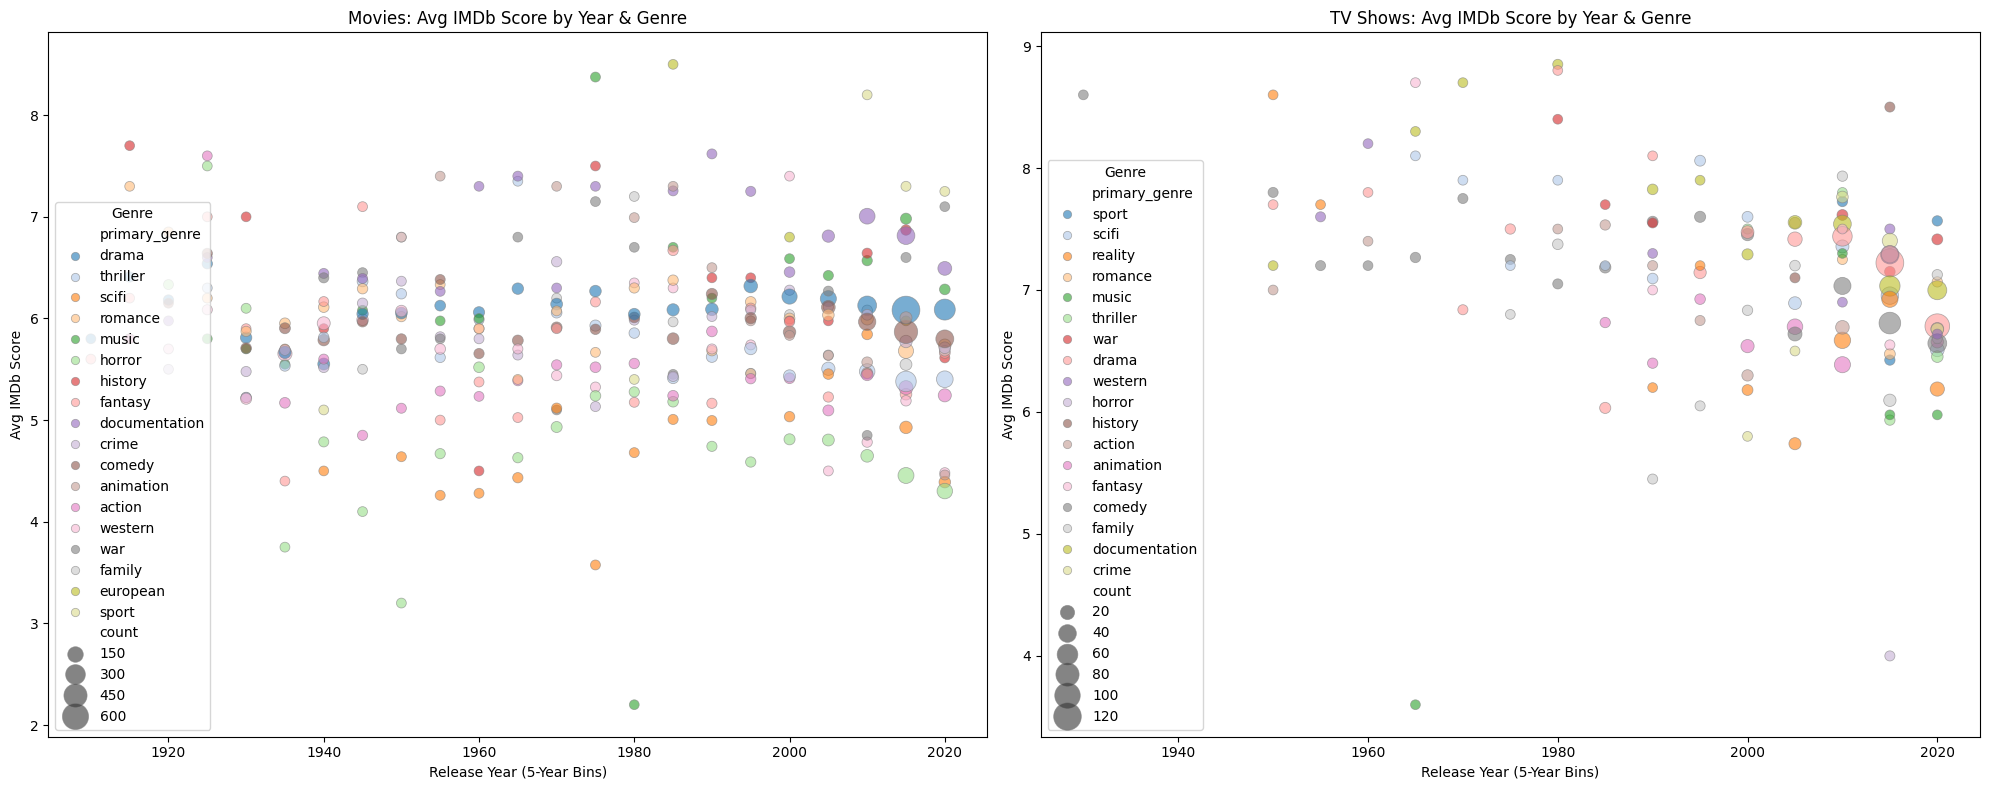

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Movie bubble plot
sns.scatterplot(
    data=filtered_movie,
    x='release_year_5yr',
    y='mean_score',
    size='count',
    hue='primary_genre',
    palette='tab20',
    sizes=(50, 400),
    alpha=0.6,
    edgecolor='gray',
    ax=ax1
)
ax1.set_title('Movies: Avg IMDb Score by Year & Genre')
ax1.set_xlabel('Release Year (5-Year Bins)')
ax1.set_ylabel('Avg IMDb Score')
ax1.legend().set_title('Genre')

# TV Show bubble plot
sns.scatterplot(
    data=filtered_tv,
    x='release_year_5yr',
    y='mean_score',
    size='count',
    hue='primary_genre',
    palette='tab20',
    sizes=(50, 400),
    alpha=0.6,
    edgecolor='gray',
    ax=ax2
)
ax2.set_title('TV Shows: Avg IMDb Score by Year & Genre')
ax2.set_xlabel('Release Year (5-Year Bins)')
ax2.set_ylabel('Avg IMDb Score')
ax2.legend().set_title('Genre')

plt.tight_layout()
plt.show()


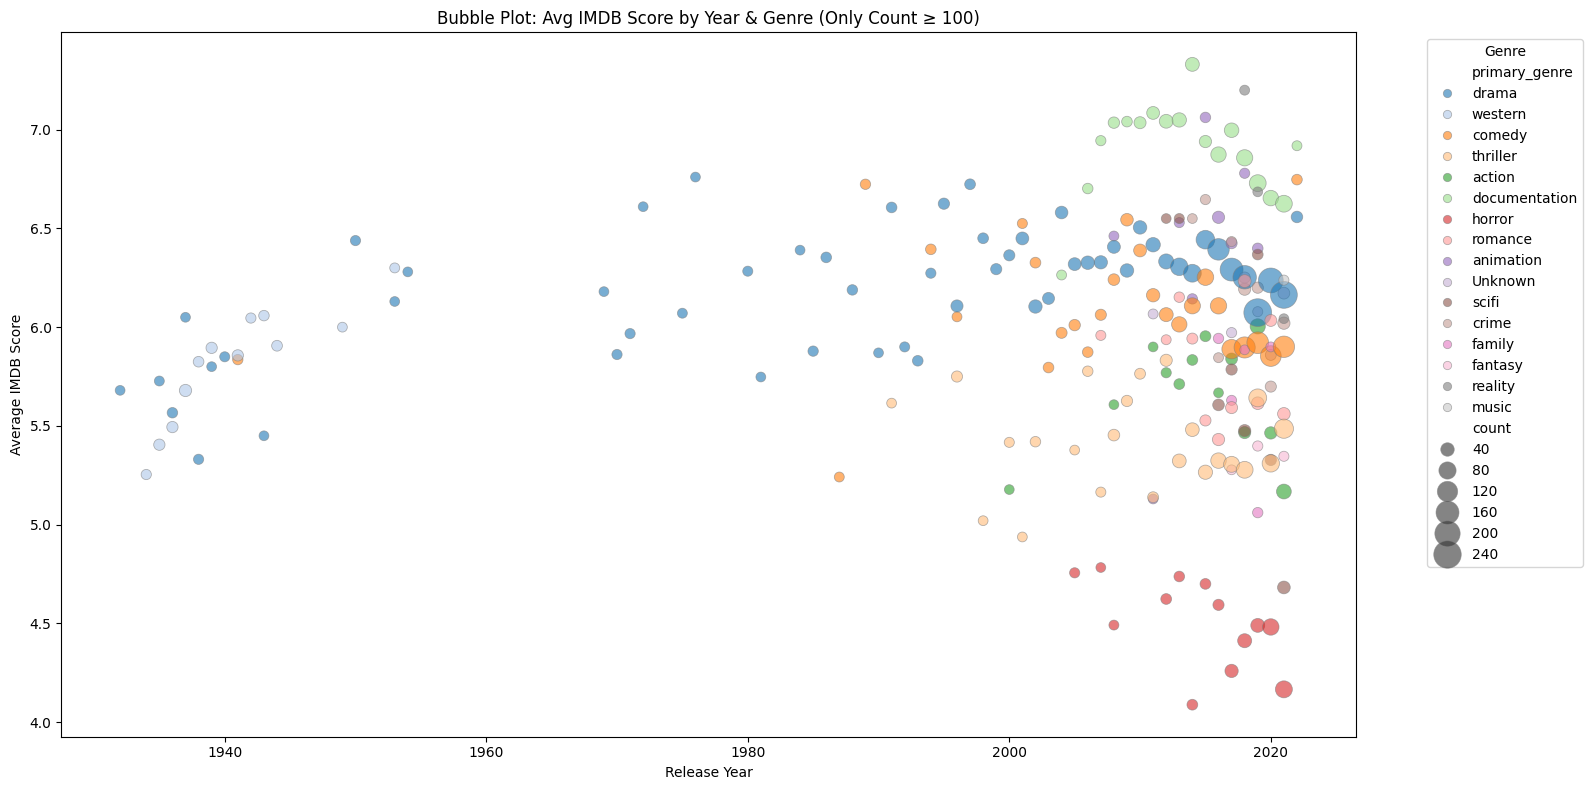

In [63]:
# Ensure primary_genre column is available
data_titles['primary_genre'] = data_titles['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Group and aggregate
grouped = data_titles.groupby(['release_year', 'primary_genre']).agg(
    mean_score=('imdb_score', 'mean'),
    count=('imdb_score', 'count')
).reset_index()

# ✅ Filter out groups with fewer than 100 titles
grouped = grouped[grouped['count'] >= 10]

# Plot
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=grouped,
    x='release_year',
    y='mean_score',
    size='count',
    hue='primary_genre',
    palette='tab20',
    sizes=(50, 400),
    alpha=0.6,
    edgecolor='gray'
)

plt.title('Bubble Plot: Avg IMDB Score by Year & Genre (Only Count ≥ 100)')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genre')
plt.tight_layout()
plt.show()


In [64]:
df_titles_explode.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [65]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'primary_genre', 'release_year_5yr'],
      dtype='object')

/tmp/ipython-input-66-1001599616.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-66-1001599616.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




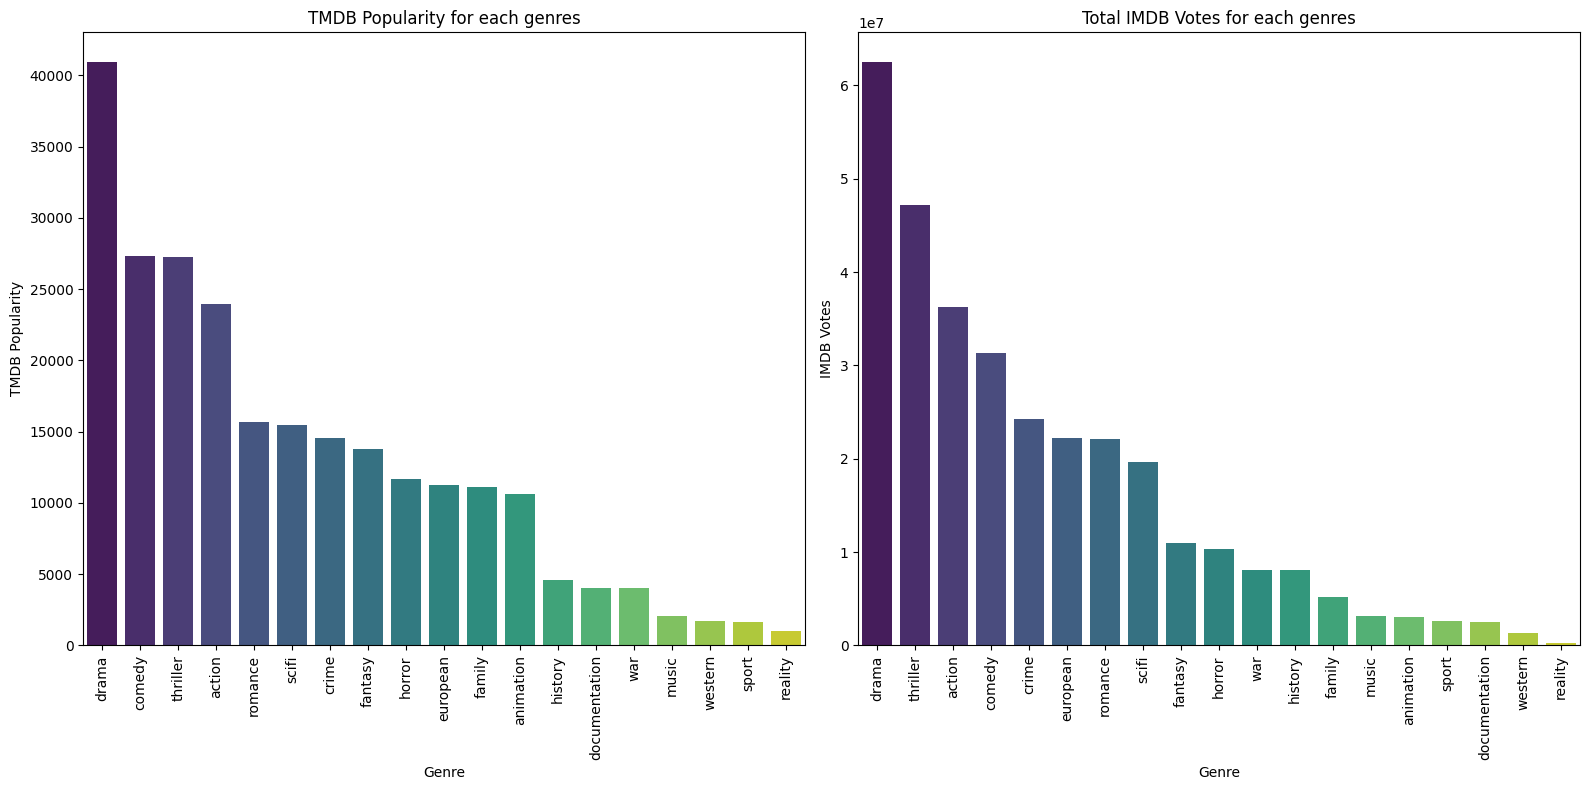

In [66]:
# Create a figure with 2 subplots (1 column, 2 rows)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# First plot: TMDB popularity by genre
sns.barplot(ax=axes[0], x='genres', y='tmdb_popularity', data=top_cont_pop_tmdb, palette='viridis')
axes[0].set_title('TMDB Popularity for each genres')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('TMDB Popularity')
axes[0].tick_params(axis='x', rotation=90)

# Second plot: IMDB votes by genre
sns.barplot(ax=axes[1], x='genres', y='imdb_votes', data=top_cont_gen_imdb, palette='viridis')
axes[1].set_title('Total IMDB Votes for each genres')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('IMDB Votes')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()
